In [1]:
import pandas as pd

In [2]:
sales_df = pd.read_csv('./data/Advertising.csv')

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
sales_df.head(10)

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
5           6    8.7   48.9       75.0    7.2
6           7   57.5   32.8       23.5   11.8
7           8  120.2   19.6       11.6   13.2
8           9    8.6    2.1        1.0    4.8
9          10  199.8    2.6       21.2   10.6

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn

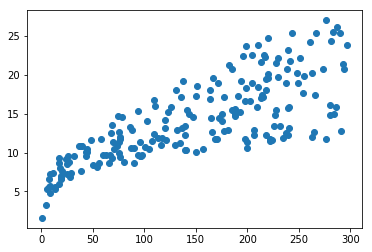

In [7]:
plt.scatter(sales_df.TV, sales_df.Sales);

### Dropping a column

In [8]:
sales_df = sales_df.drop('Unnamed: 0', axis = 1)

In [10]:
sales_df[0:5]

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

### Correlation matrix and heatmap

In [11]:
sales_df.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

### Split dataset into train and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, \
y_train, y_test = train_test_split( sales_df[['TV', 
                                              'Radio', 
                                              'Newspaper']],
                                    sales_df.Sales,
                                    train_size = 0.8,
                                    random_state = 100 )

In [20]:
X_train.shape

(160, 3)

In [21]:
X_test.shape

(40, 3)

In [22]:
X_train[0:5]

TV  Radio  Newspaper
168  215.4   23.6       57.6
112  175.7   15.4        2.4
171  164.5   20.9       47.4
181  218.5    5.4       27.4
7    120.2   19.6       11.6

### Building a Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lreg_v1 = LinearRegression()

In [26]:
lreg_v1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
lreg_v1.intercept_

2.8172751352950005

In [28]:
lreg_v1.coef_

array([0.0455864 , 0.18569816, 0.00223281])

In [29]:
dict(zip(['TV', 
     'Radio', 
     'Newspaper'], lreg_v1.coef_))

{'TV': 0.045586396923019155,
 'Radio': 0.18569815745973392,
 'Newspaper': 0.0022328102410188524}

### Predicting on test set

In [30]:
y_pred = lreg_v1.predict(X_test)

In [31]:
y_df = pd.DataFrame( { "actual": y_test,
                       "predicted": y_pred } )

In [32]:
y_df.head(5)

actual  predicted
126     6.6  10.509488
104    20.7  20.057236
99     17.2  16.826655
92     19.4  19.094058
111    21.8  20.943838

In [33]:
y_df['residual'] = y_df.actual - y_df.predicted

In [34]:
y_df.head(5)

actual  predicted  residual
126     6.6  10.509488 -3.909488
104    20.7  20.057236  0.642764
99     17.2  16.826655  0.373345
92     19.4  19.094058  0.305942
111    21.8  20.943838  0.856162

In [35]:
from sklearn.metrics import mean_squared_error

In [38]:
mse_v1 = mean_squared_error(y_df.actual, y_df.predicted)

In [37]:
import numpy as np

In [39]:
rmse_v1 = np.sqrt(mse_v1)

In [40]:
rmse_v1

1.3165457764851067

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_df.actual, y_df.predicted)

0.9184369032278497

In [44]:
X_train['tv_radio'] = X_train['TV'] * X_train['Radio']

In [45]:
X_test['tv_radio'] = X_test['TV'] * X_test['Radio']

### Build a new Linear Model (v2)

### Using K-Fold Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
scores = cross_val_score( LinearRegression(),
                          X_train,
                          y_train,
                          cv = 5,
                          scoring = 'r2' )

In [48]:
scores

array([0.96612485, 0.97087485, 0.96926517, 0.97593387, 0.93389054])

In [49]:
scores.std()

0.01500292431852364

In [50]:
scores.mean()

0.9632178551479843

In [51]:
lreg_v2 = LinearRegression()

In [52]:
lreg_v2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
y_pred_v2 = lreg_v2.predict(X_test)

In [54]:
mse_v2 = mean_squared_error(y_test, y_pred_v2)

In [55]:
np.sqrt(mse_v2)

0.6527790322684008

### Saving the model

In [56]:
from sklearn.externals import joblib

In [58]:
joblib.dump(lreg_v2, "sales.pkl")

['sales.pkl']

### Build a KNN Model

In [59]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
knn_v1 = KNeighborsRegressor(n_neighbors = 5,
                             weights = 'distance')

In [63]:
knn_v1.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance')

### Grid Search of Hyperparameters

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
knn_v2 = KNeighborsRegressor()

In [68]:
params_search = { "n_neighbors": range(5,15),
                  "weights": ['uniform', 'distance']}

In [69]:
knn_grid = GridSearchCV( knn_v2,
                         param_grid = params_search,
                         cv = 5,
                         scoring = 'r2')

In [70]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(5, 15), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [71]:
knn_grid.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [72]:
knn_grid.best_score_

0.9737021612198312

In [73]:
knn_grid.cv_results_

/Users/manaranjan/anaconda/envs/py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/manaranjan/anaconda/envs/py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/manaranjan/anaconda/envs/py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **wa

{'mean_fit_time': array([0.00160503, 0.00142498, 0.00137115, 0.00170617, 0.00164456,
        0.00132823, 0.00128512, 0.00126166, 0.00127273, 0.00124288,
        0.00126381, 0.00124488, 0.00126743, 0.00125036, 0.0012527 ,
        0.00127459, 0.00134568, 0.00125856, 0.00126615, 0.00127301]),
 'std_fit_time': array([2.24542208e-04, 7.30248358e-05, 5.02858640e-05, 2.55821709e-04,
        1.27783853e-04, 4.18724390e-05, 4.00935843e-05, 1.84852983e-05,
        3.46931066e-05, 3.44842620e-06, 2.86921283e-05, 6.34139640e-06,
        2.75507085e-05, 4.19128741e-06, 3.78597894e-06, 3.33888174e-05,
        1.38513553e-04, 6.41412448e-06, 1.54193242e-05, 1.86434182e-05]),
 'mean_score_time': array([0.00125279, 0.00121188, 0.00111423, 0.00132012, 0.00124478,
        0.00114074, 0.00109444, 0.00112615, 0.00108066, 0.00112185,
        0.00107956, 0.00112581, 0.00111442, 0.00113187, 0.00109282,
        0.00117807, 0.0011117 , 0.00113897, 0.00111375, 0.00114512]),
 'std_score_time': array([1.90321032e-

In [74]:
knn_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [75]:
knn_grid.cv_results_['mean_test_score']

array([0.96697055, 0.97370216, 0.96346054, 0.97162628, 0.96167456,
       0.9705532 , 0.96114505, 0.96992825, 0.95969281, 0.96902478,
       0.95838443, 0.96828364, 0.95462629, 0.96657387, 0.95403035,
       0.96613038, 0.95193898, 0.96518043, 0.9514186 , 0.96497607])

In [76]:
knn_grid.cv_results_['std_test_score']

array([0.01493792, 0.01407669, 0.01403411, 0.01391758, 0.00971953,
       0.01168607, 0.00919254, 0.01119509, 0.00898727, 0.01081019,
       0.00925301, 0.01068215, 0.01062751, 0.01107791, 0.01178227,
       0.01093968, 0.01426949, 0.01165694, 0.01354064, 0.01132163])

In [78]:
grid_df = pd.DataFrame( { "params": knn_grid.cv_results_['params'],
                          "r2_mean": knn_grid.cv_results_['mean_test_score'],
                          "r2_std": knn_grid.cv_results_['std_test_score'] } )

In [79]:
grid_df

params   r2_mean    r2_std
0     {'n_neighbors': 5, 'weights': 'uniform'}  0.966971  0.014938
1    {'n_neighbors': 5, 'weights': 'distance'}  0.973702  0.014077
2     {'n_neighbors': 6, 'weights': 'uniform'}  0.963461  0.014034
3    {'n_neighbors': 6, 'weights': 'distance'}  0.971626  0.013918
4     {'n_neighbors': 7, 'weights': 'uniform'}  0.961675  0.009720
5    {'n_neighbors': 7, 'weights': 'distance'}  0.970553  0.011686
6     {'n_neighbors': 8, 'weights': 'uniform'}  0.961145  0.009193
7    {'n_neighbors': 8, 'weights': 'distance'}  0.969928  0.011195
8     {'n_neighbors': 9, 'weights': 'uniform'}  0.959693  0.008987
9    {'n_neighbors': 9, 'weights': 'distance'}  0.969025  0.010810
10   {'n_neighbors': 10, 'weights': 'uniform'}  0.958384  0.009253
11  {'n_neighbors': 10, 'weights': 'distance'}  0.968284  0.010682
12   {'n_neighbors': 11, 'weights': 'uniform'}  0.954626  0.010628
13  {'n_neighbors': 11, 'weights': 'distance'}  0.966574  0.011078
14   {'n_neighbors': 12, 'weights': 'uniform'}  0.954030  0.011782
15  {'n_neighbors': 12, 'weights': 'distance'}  0.966130  0.010940
16   {'n_neighbors': 13, 'weights': 'uniform'}  0.951939  0.014269
17  {'n_neighbors': 13, 'weights': 'distance'}  0.965180  0.011657
18   {'n_neighbors': 14, 'weights': 'uniform'}  0.951419  0.013541
19  {'n_neighbors': 14, 'weights': 'distance'}  0.964976  0.011322

In [80]:
grid_df.sort_values('r2_mean', ascending = False)

params   r2_mean    r2_std
1    {'n_neighbors': 5, 'weights': 'distance'}  0.973702  0.014077
3    {'n_neighbors': 6, 'weights': 'distance'}  0.971626  0.013918
5    {'n_neighbors': 7, 'weights': 'distance'}  0.970553  0.011686
7    {'n_neighbors': 8, 'weights': 'distance'}  0.969928  0.011195
9    {'n_neighbors': 9, 'weights': 'distance'}  0.969025  0.010810
11  {'n_neighbors': 10, 'weights': 'distance'}  0.968284  0.010682
0     {'n_neighbors': 5, 'weights': 'uniform'}  0.966971  0.014938
13  {'n_neighbors': 11, 'weights': 'distance'}  0.966574  0.011078
15  {'n_neighbors': 12, 'weights': 'distance'}  0.966130  0.010940
17  {'n_neighbors': 13, 'weights': 'distance'}  0.965180  0.011657
19  {'n_neighbors': 14, 'weights': 'distance'}  0.964976  0.011322
2     {'n_neighbors': 6, 'weights': 'uniform'}  0.963461  0.014034
4     {'n_neighbors': 7, 'weights': 'uniform'}  0.961675  0.009720
6     {'n_neighbors': 8, 'weights': 'uniform'}  0.961145  0.009193
8     {'n_neighbors': 9, 'weights': 'uniform'}  0.959693  0.008987
10   {'n_neighbors': 10, 'weights': 'uniform'}  0.958384  0.009253
12   {'n_neighbors': 11, 'weights': 'uniform'}  0.954626  0.010628
14   {'n_neighbors': 12, 'weights': 'uniform'}  0.954030  0.011782
16   {'n_neighbors': 13, 'weights': 'uniform'}  0.951939  0.014269
18   {'n_neighbors': 14, 'weights': 'uniform'}  0.951419  0.013541

In [81]:
knn_v2 = knn_grid.best_estimator_